In [22]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, util, measure, feature, filters, data, morphology, color, transform, draw, segmentation
from scipy import ndimage, misc, signal, spatial, stats, fftpack, optimize
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq, readseq

In [7]:
loadf1 = io.imread('R://Dip/DF/Relax/nolight-light/0000.tif')
loadf2 = io.imread('R://Dip/DF/Relax/nolight-light/0200.tif')
frame1 = util.img_as_float(util.invert(np.asarray(loadf1)))
frame2 = util.img_as_float(util.invert(np.asarray(loadf2)))

In [8]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [9]:
f_1 = np.fft.fft2(frame1)
f_2 = np.fft.fft2(frame2)
fshift_1 = np.fft.fftshift(f_1)
fshift_2 = np.fft.fftshift(f_2)

In [10]:
fft1 = np.log(np.abs(fshift_1))
fft2 = np.log(np.abs(fshift_2))

2495.113314721049
2662.475590434095


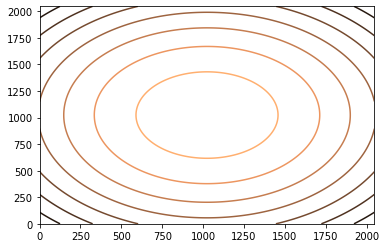

In [11]:
params = fitgaussian(fft1)
fit = gaussian(*params)

plt.contour(fit(*np.indices(fft1.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params
print(width_x)
print(width_y)

2706.149006028275
2907.0725659482637


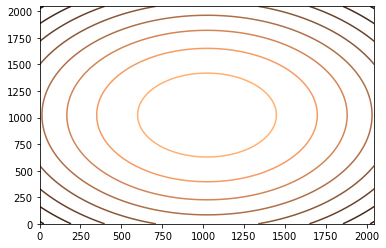

In [12]:
params = fitgaussian(fft2)
fit = gaussian(*params)

plt.contour(fit(*np.indices(fft2.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params
print(width_x)
print(width_y)

In [33]:
folder = r'R:\Dip\DF\Relax\nolight-light'
fileList = readseq(folder)
xx = []
yy = []
for num, i in fileList.iterrows():
    print('Processing frame {:04}'.format(int(i.Name)))
    imgDir = i.Dir
    img = io.imread(imgDir)
    frame = util.img_as_float(util.invert(np.asarray(img)))
    fft = np.fft.fft2(frame)
    fshift = np.fft.fftshift(fft)
    ffta = np.log(np.abs(fshift))
    params = fitgaussian(ffta)
    fit = gaussian(*params)
    (height, x, y, width_x, width_y) = params
    xx.append(width_x)
    yy.append(width_y)

Processing frame 0000
Processing frame 0001
Processing frame 0002
Processing frame 0003
Processing frame 0004
Processing frame 0005
Processing frame 0006
Processing frame 0007
Processing frame 0008
Processing frame 0009
Processing frame 0010
Processing frame 0011
Processing frame 0012
Processing frame 0013
Processing frame 0014
Processing frame 0015
Processing frame 0016
Processing frame 0017
Processing frame 0018
Processing frame 0019
Processing frame 0020
Processing frame 0021
Processing frame 0022
Processing frame 0023
Processing frame 0024
Processing frame 0025
Processing frame 0026
Processing frame 0027
Processing frame 0028
Processing frame 0029
Processing frame 0030
Processing frame 0031
Processing frame 0032
Processing frame 0033
Processing frame 0034
Processing frame 0035
Processing frame 0036
Processing frame 0037
Processing frame 0038
Processing frame 0039
Processing frame 0040
Processing frame 0041
Processing frame 0042
Processing frame 0043
Processing frame 0044
Processing

Processing frame 0373
Processing frame 0374
Processing frame 0375
Processing frame 0376
Processing frame 0377
Processing frame 0378
Processing frame 0379
Processing frame 0380
Processing frame 0381
Processing frame 0382
Processing frame 0383
Processing frame 0384
Processing frame 0385
Processing frame 0386
Processing frame 0387
Processing frame 0388
Processing frame 0389
Processing frame 0390
Processing frame 0391
Processing frame 0392
Processing frame 0393
Processing frame 0394
Processing frame 0395
Processing frame 0396
Processing frame 0397
Processing frame 0398
Processing frame 0399
Processing frame 0400
Processing frame 0401
Processing frame 0402
Processing frame 0403
Processing frame 0404
Processing frame 0405
Processing frame 0406
Processing frame 0407
Processing frame 0408
Processing frame 0409
Processing frame 0410
Processing frame 0411
Processing frame 0412
Processing frame 0413
Processing frame 0414
Processing frame 0415
Processing frame 0416
Processing frame 0417
Processing

In [25]:
folder = r'R:\Dip\DF\Relax\nolight-light'
fileList = readseq(folder)

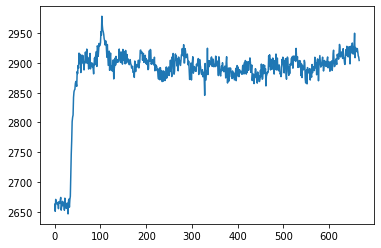

In [36]:
plt.plot(np.array(yy))

In [17]:
def func(x, y, z):
    return x+y+z